In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
def notEmpty(s):
    return s != ''

In [4]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

## 分割数据
x, y = np.split(data, (13,), axis=1)
y = y.ravel() # 转换格式

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [5]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

In [6]:
## 模型构建（参数类型和SVC基本一样）
parameters = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 0.5],
    'gamma': [0.0001, 0.0005]
}
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear'], 'C': [0.1, 0.5], 'gamma': [0.0001, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
## 获取最优参数
print ("最优参数列表:", model.best_params_)
print ("最优模型:", model.best_estimator_)
print ("最优准确率:", model.best_score_)

最优参数列表: {'C': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}
最优模型: SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
最优准确率: 0.7350447806084769


In [8]:
## 模型效果输出
print ("训练集准确率:%.2f%%" % (model.score(x_train, y_train) * 100))
print ("测试集准确率:%.2f%%" % (model.score(x_test, y_test) * 100))

训练集准确率:74.06%
测试集准确率:49.98%


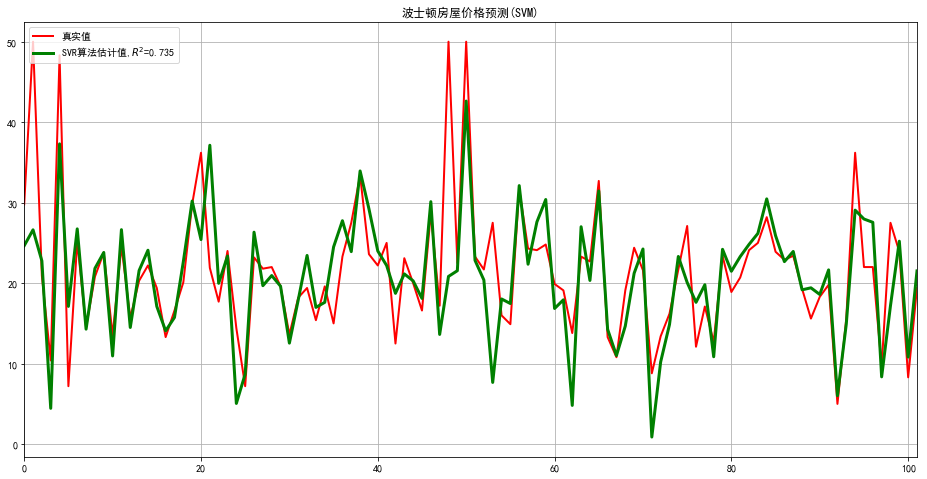

In [9]:
## 画图
colors = ['g-', 'b-']
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

plt.figure(figsize=(16,8), facecolor='w')
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
plt.plot(ln_x_test, y_predict, 'g-', lw = 3, label=u'SVR算法估计值,$R^2$=%.3f' % (model.best_score_))

# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测(SVM)")
plt.xlim(0, 101)
plt.show()
